In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from scipy.spatial import Delaunay

In [80]:
H, W = 10, 10
cx, cy = 7.5, 2.5
cx1, cy1 = 2.5, 7.5
r = 2
g = 0.25

In [4]:
G0y = np.arange(0, H, g)
G0x = np.zeros_like(G0y)
G0y

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
       5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
       8.25, 8.5 , 8.75, 9.  , 9.25, 9.5 , 9.75])

In [25]:
G1x = np.arange(0, W, g)
G1y = np.zeros_like(G1x) + H
G1x

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
       5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
       8.25, 8.5 , 8.75, 9.  , 9.25, 9.5 , 9.75])

In [26]:
G2y = np.arange(H, 0, -g)
G2x = np.zeros_like(G2y)+W
G2y

array([10.  ,  9.75,  9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,
        7.75,  7.5 ,  7.25,  7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,
        5.5 ,  5.25,  5.  ,  4.75,  4.5 ,  4.25,  4.  ,  3.75,  3.5 ,
        3.25,  3.  ,  2.75,  2.5 ,  2.25,  2.  ,  1.75,  1.5 ,  1.25,
        1.  ,  0.75,  0.5 ,  0.25])

In [27]:
G3x = np.arange(W, 0, -g)
G3y = np.zeros_like(G3x)
G3x

array([10.  ,  9.75,  9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,
        7.75,  7.5 ,  7.25,  7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,
        5.5 ,  5.25,  5.  ,  4.75,  4.5 ,  4.25,  4.  ,  3.75,  3.5 ,
        3.25,  3.  ,  2.75,  2.5 ,  2.25,  2.  ,  1.75,  1.5 ,  1.25,
        1.  ,  0.75,  0.5 ,  0.25])

In [28]:
# внешняя граница
Gout = np.vstack((np.vstack((G0x, G0y)).T,
                    np.vstack((G1x, G1y)).T,
                    np.vstack((G2x, G2y)).T,
                    np.vstack((G3x, G3y)).T,
                   ))
Gout.shape

(160, 2)

In [81]:
alpha = np.arange(0, 2*np.pi, g/r)
G4x = cx + r*np.cos(alpha)
G4y = cy + r*np.sin(alpha)
G5x = cx1 + r*np.cos(alpha)
G5y = cy1 + r*np.sin(alpha)
alpha

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
       1.125, 1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   , 2.125,
       2.25 , 2.375, 2.5  , 2.625, 2.75 , 2.875, 3.   , 3.125, 3.25 ,
       3.375, 3.5  , 3.625, 3.75 , 3.875, 4.   , 4.125, 4.25 , 4.375,
       4.5  , 4.625, 4.75 , 4.875, 5.   , 5.125, 5.25 , 5.375, 5.5  ,
       5.625, 5.75 , 5.875, 6.   , 6.125, 6.25 ])

In [82]:
# внутренняя граница
Gin0 = np.vstack((G4x, G4y)).T
Gin1 = np.vstack((G5x, G5y)).T
Gin0.shape

(51, 2)

(-0.5, 10.5, -0.5, 10.5)

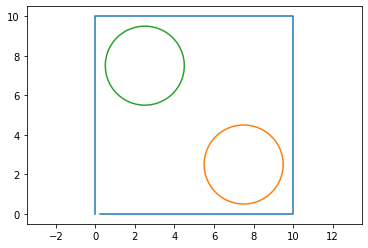

In [83]:
plt.plot(Gout[:,0], Gout[:,1])
plt.plot(Gin0[:,0], Gin0[:,1])
plt.plot(Gin1[:,0], Gin1[:,1])
plt.axis('equal')

In [84]:
margin = 0.2

In [85]:
x = np.linspace(0+margin, W-margin, 40)
y = np.linspace(0+margin, H-margin, 40)
X, Y = np.meshgrid(x, y)

(-0.5, 10.5, -0.5, 10.5)

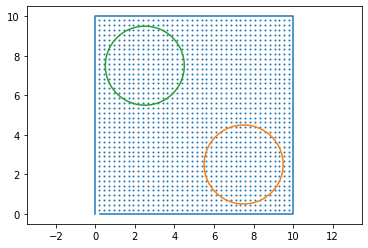

In [87]:
plt.plot(Gout[:,0], Gout[:,1])
plt.plot(Gin0[:,0], Gin0[:,1])
plt.plot(Gin1[:,0], Gin1[:,1])
plt.scatter(X, Y, s=1)
plt.axis('equal')

In [88]:
INodes = np.vstack((X.ravel(), Y.ravel())).T
# прямое вычисление маски
imask0 = np.sum((INodes - np.array([cx, cy]))**2,axis=1) >= (r + 0.25)**2
imask1 = np.sum((INodes - np.array([cx1, cy1]))**2,axis=1) >= (r + 0.25)**2
INodes = INodes[imask0 & imask1]
INodes.shape

(1074, 2)

(-0.5, 10.5, -0.5, 10.5)

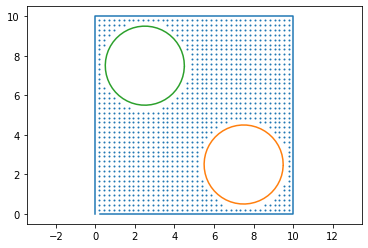

In [89]:
plt.plot(Gout[:,0], Gout[:,1])
plt.plot(Gin0[:,0], Gin0[:,1])
plt.plot(Gin1[:,0], Gin1[:,1])
plt.scatter(INodes[:,0], INodes[:,1], s=1)
plt.axis('equal')

In [90]:
Nodes = np.vstack((Gout, Gin0, Gin1, INodes))
Nodes.shape

(1336, 2)

In [91]:
tri = Delaunay(Nodes)
Elems = tri.simplices.copy()

(-0.5, 10.5, -0.5, 10.5)

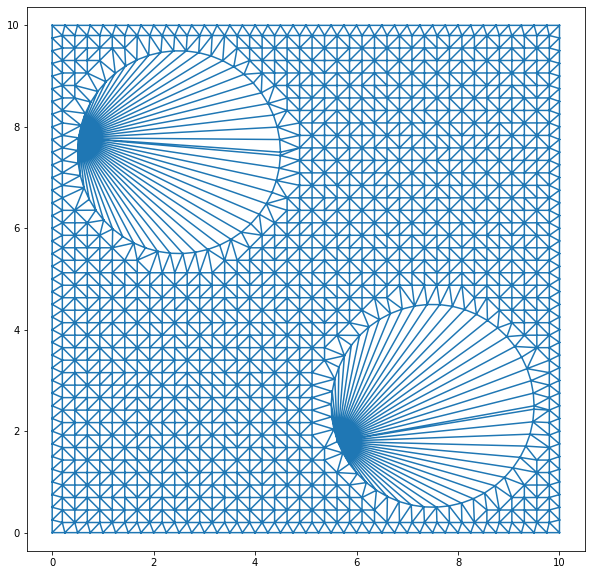

In [92]:
plt.figure(figsize=(10,10))
plt.triplot(Nodes[:,0], Nodes[:,1], Elems)
plt.axis('equal')

In [93]:
Nodes.shape[0] - INodes.shape[0]

262

In [94]:
Gout.shape, Gin0.shape

((160, 2), (51, 2))

In [95]:
Elems > Nodes.shape[0] - INodes.shape[0]

array([[False, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [96]:
np.all(np.any(Elems > Nodes.shape[0] - INodes.shape[0], axis=1))

False

In [97]:
Elems = tri.simplices.copy()
emask = np.any(Elems >= Nodes.shape[0] - INodes.shape[0], axis=1)
Elems = Elems[emask]

(-0.5, 10.5, -0.5, 10.5)

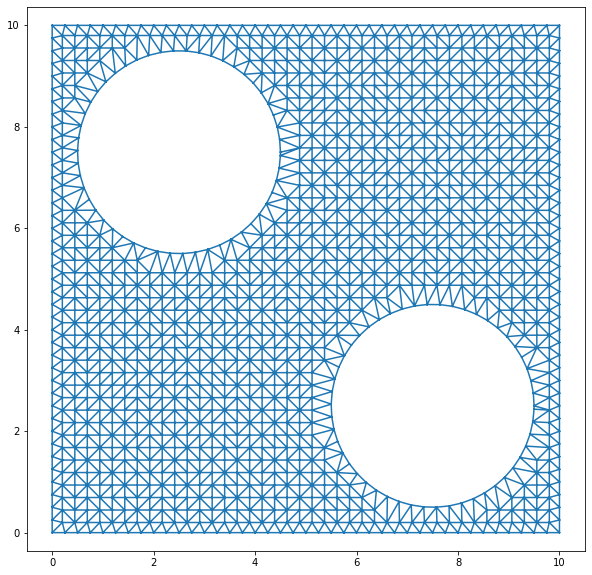

In [98]:
plt.figure(figsize=(10,10))
plt.triplot(Nodes[:,0], Nodes[:,1], Elems)
plt.axis('equal')